Student ID: 3034963465

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import os


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import sys
!{sys.executable} -m pip install mat73
import mat73

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
def simulate_membrane(capacitance, Gleak, I, sim_time, 
                      delta_t, Vrest):

    tau = capacitance / Gleak  
    alpha = delta_t / tau
    time_intervals = np.arange(0,sim_time,delta_t)
    V_t  = []
    I_time = np.zeros_like(time_intervals)
    I_time[int(I/delta_t):] = I


    for n, time in enumerate(time_intervals):

        if (n ==0):
            V_t.append(Vrest)
        else:
            V_t.append((1 - alpha)*V_t[n-1] + alpha*(Vrest + (1/Gleak)*I_time[n]))
    

    
    return V_t, time_intervals

Text(0, 0.5, 'Membrane Voltage (V)')

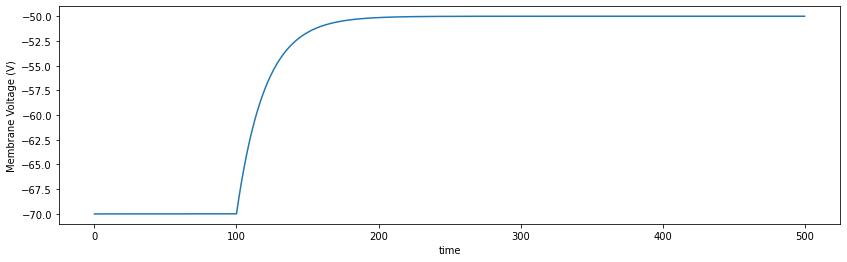

In [ ]:

V_t, time_elapsed = simulate_membrane(100,5,100,500,0.01,-70)
fig, ax = plt.subplots(figsize=(14, 4))
plt.plot(time_elapsed, V_t)
plt.xlabel('time')
plt.ylabel('Membrane Voltage (V)')


Text(0, 0.5, 'Membrane Voltage (V)')

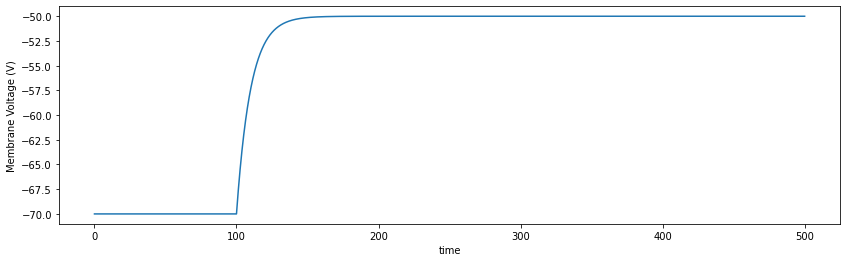

In [ ]:
V_t, time_elapsed = simulate_membrane(50,5,100,500,0.01,-70)
fig, ax = plt.subplots(figsize=(14, 4))
plt.plot(time_elapsed, V_t)
plt.xlabel('time')
plt.ylabel('Membrane Voltage (V)')

In [ ]:
Gna = np.arange(0,25)
Vna = 55
Vk  = 0#-92
Gk  = 0#10 
Vr  = -70
Gleak = 5
V_varyingGna = []
for i in range(len(Gna)):
  V_varyingGna.append(((Vr*Gleak) + (Vna*Gna[i]) + (Vk*Gk))/(Gleak+Gna[i]+Gk))




Text(0.5, 0, 'Delta G_Na')

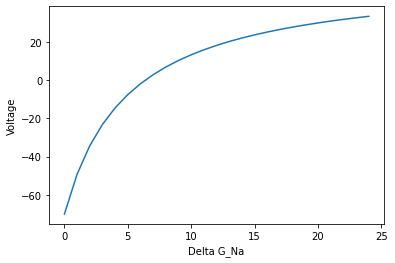

In [ ]:
plt.plot(V_varyingGna)
plt.ylabel('Voltage')
plt.xlabel('Delta G_Na')

In [ ]:
Gna= 0#1#np.arange(0,25)
Vna = 0#55
Vk = -92
Gk = np.arange(0,25)
Vr = -70
Gleak = 5
V_varyingGKandGNa =[]
for i in range(len(Gk)):
  V_varyingGKandGNa.append((Vr*Gleak + Vna*Gna + Vk*Gk[i])/(Gleak+Gna+Gk[i]))


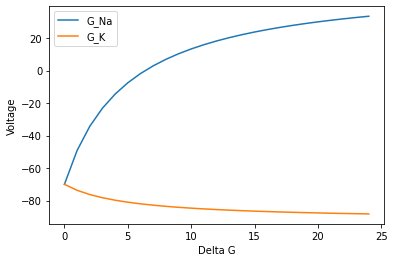

In [ ]:
plt.plot(V_varyingGna,label='G_Na')
plt.plot(V_varyingGKandGNa,label ='G_K')
plt.ylabel('Voltage')
plt.xlabel('Delta G')
plt.legend()

In [ ]:
Gna= np.arange(0,5,1)
Vna = 55
Vk = -92
Gk = np.arange(0,5,1)
Vr = -70
Gleak = 0#5
Vcl = -70
Gcl = 10
V_contourplot=np.zeros([len(Gna),len(Gk)])

for j in range(len(Gna)):
  for i in range(len(Gk)): 

    V_contourplot[j,i]=((Vr*Gleak + Vna*Gna[j] + Vk*Gk[i] + Vcl*Gcl)/(Gleak+Gna[j]+Gk[i]+Gcl))



Text(0.5, 1.0, 'Voltage as a function of varying GNa and Gk')

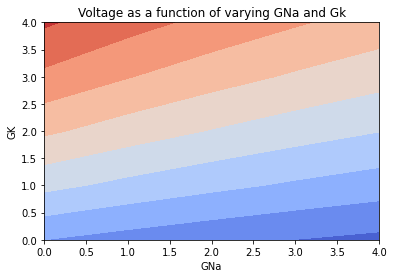

In [ ]:
plt.contourf(V_contourplot,levels=8,cmap='coolwarm')
plt.xlabel('GNa')
plt.ylabel('GK')
plt.title('Voltage as a function of varying GNa and Gk')

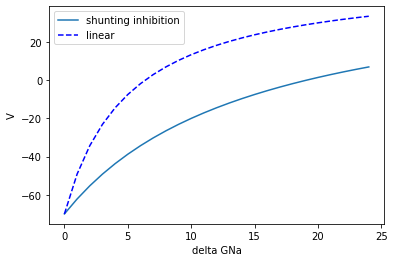

In [ ]:
Gna= np.arange(0,25)
Vna = 55
Vk = 0#-92
Gk = 0#np.arange(0,25)
Vr = -70
Gleak = 5
GCl = 10
VCl = Vr
V_varyingGNa_Cl =[]
V_varyingGNa_2 =[]
V_varyingGNa_3 =[]
for i in range(len(Gna)):
  V_varyingGNa_Cl.append((Vr*Gleak + Vna*Gna[i] + VCl*GCl)/(Gleak+Gna[i]+GCl))
  V_varyingGNa_2.append(((Vr*Gleak + Vna*Gna[i])/(Gleak+Gna[i])+70) + ((Vr*Gleak + VCl*GCl)/(Gleak+GCl)+70)-70)

plt.plot(V_varyingGNa_Cl,label='shunting inhibition')
plt.ylabel('V')
plt.xlabel('delta GNa')
plt.plot(V_varyingGNa_2,'--b',label='linear')

plt.legend()


In [ ]:
datadir = "/content/gdrive/MyDrive/NeuralComputation/"
dataset = mat73.loadmat(datadir+'PS1_Part2_dataset.mat')


In [ ]:
labels=dataset['labels']
points=dataset['points']

In [ ]:

def perceptron_prediction(points,weights,w0):
    pt0 = points[0]
    pt1 = points[1]
    
    u =  pt0 *weights[0] + pt1*weights[1] + w0

    if u >0:
        y_pred = 1
    else:
        y_pred = 0

    label = (2*y_pred)-1

    return label


def update_weights(label_actual,label_predicted,points,weights,w0,learning_rate):
    pt0 = points[0]
    pt1 = points[1]
    
    if label_predicted == label_actual:
        weights += 0
        w0 += 0
    else:
        weights[0] += 2*learning_rate*label_actual*pt0
        weights[1] += 2*learning_rate*label_actual*pt1
        w0 += 2*learning_rate*label_actual*1

        
    return weights, w0 

Text(0.5, 1.0, 'Predictive Accuracy by Training Epoch\n')

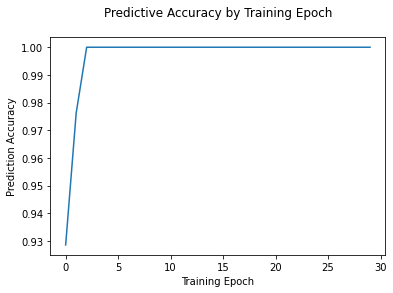

In [ ]:
training_steps = 30
learning_rate = 0.02

w0 = 0
w=np.random.normal(0,1, size=[2])
iterationaccuracy =[] 

for n in range(training_steps):
    labels_predicted_iterations = []
    
    #Run through each data point and update weights 
    for index, point in enumerate(points):
        
        l_predicted = perceptron_prediction(point,w,w0) 
        labels_predicted_iterations.append(l_predicted)
        
        w, w0 = update_weights(labels[index],l_predicted, point, w, w0,learning_rate)
    
    iterationaccuracy.append(np.mean(labels_predicted_iterations==labels))

plt.plot(iterationaccuracy)
plt.xlabel('Training Epoch')
plt.ylabel('Prediction Accuracy')
plt.title('Predictive Accuracy by Training Epoch\n')




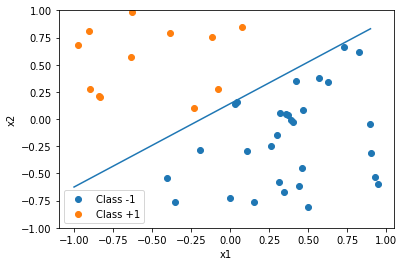

In [ ]:
neg_pred=points[np.array(labels_predicted_iterations)==-1]
pos_pred =points[np.array(labels_predicted_iterations)==1]
plt.scatter(neg_pred[:,0],neg_pred[:,1],label='Class -1')
plt.scatter(pos_pred[:,0],pos_pred[:,1],label='Class +1')
plt.ylim([-1,1])
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
slope = ((-w0 / w[1]) / (w0/w[0]))
y_intercept = -w0/w[1]
x = np.arange(-1,1,0.1)
plt.plot(x, slope*x + y_intercept)